# NESTML Clopath synapse tutorial

In this tutorial, ...

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
import matplotlib.pyplot as plt
import nest
import numpy as np
import os
import re

from pynestml.codegeneration.nest_code_generator_utils import NESTCodeGeneratorUtils


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0-post0.dev0
 Built: Nov  8 2023 01:11:46

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



## Generating code with NESTML

### Formulating the model in NESTML

To generate fast code, NESTML needs to process the synapse model together with the neuron model that will be its postsynaptic partner in the network instantiantion.

In this tutorial, we will use a very simple integrate-and-fire model, where arriving spikes cause an instantaneous increment of the membrane potential, the "iaf_psc_delta" model.

We now define a helper function to generate the C++ code for the models, build it as a NEST extension module, and load the module into the kernel. The resulting model names are composed of associated neuron and synapse partners, because of the co-generation, for example, "stdp_synapse__with_iaf_psc_delta" and "iaf_psc_delta__with_stdp_synapse".

Because NEST does not support un- or reloading of modules at the time of writing, we implement a workaround that appends a unique number to the name of each generated model, for example, "stdp_synapse0__with_iaf_psc_delta0" and "iaf_psc_delta0__with_stdp_synapse0".

The resulting neuron and synapse model names are returned by the function, so we do not have to think about these internals.

We now go on to define the full synapse model in NESTML:

Generate the code, build the user module and make the model available to instantiate in NEST:

In [2]:
!cd ../../..

In [3]:
%pdb
module_name, neuron_model_name, synapse_model_name = NESTCodeGeneratorUtils.generate_code_for(
    "../../../models/neurons/iaf_psc_delta_neuron.nestml",
    "../../../models/synapses/clopath_synapse.nestml",
    post_ports=["post_spikes",
                ["post_membrane_potential", "V_m"]],
logging_level="DEBUG")

nest.Install(module_name)

Automatic pdb calling has been turned ON
[1,GLOBAL, INFO]: List of files that will be processed:
[2,GLOBAL, INFO]: /home/charl/julich/nestml-fork-clopath_synapse/nestml/doc/tutorials/clopath_synapse/iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron.nestml
[3,GLOBAL, INFO]: /home/charl/julich/nestml-fork-clopath_synapse/nestml/doc/tutorials/clopath_synapse/clopathfc8e7015500046febf990559a59dd6a1_synapse.nestml
[4,GLOBAL, INFO]: Target platform code will be generated in directory: '/home/charl/julich/nestml-fork-clopath_synapse/nestml/doc/tutorials/clopath_synapse/target'
[5,GLOBAL, INFO]: Target platform code will be installed in directory: '/tmp/nestml_target_6ydc_lca'

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0-post0.dev0
 Built: Nov  8 2023 01:11:46

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find 

INFO:Analysing input:
INFO:{
    "dynamics": [
        {
            "expression": "V_m' = (-(V_m - E_L)) / tau_m + 0 * (1.0 / 1.0) + (I_e + I_stim) / C_m",
            "initial_values": {
                "V_m": "E_L"
            }
        }
    ],
    "options": {
        "output_timestep_symbol": "__h"
    },
    "parameters": {
        "C_m": "250",
        "E_L": "(-70)",
        "I_e": "0",
        "V_min": "(-oo) * 1",
        "V_reset": "(-70)",
        "V_th": "(-55)",
        "refr_T": "2",
        "tau_m": "10",
        "tau_syn": "2"
    }
}
INFO:Processing global options...
INFO:Processing input shapes...
INFO:
Processing differential-equation form shape V_m with defining expression = "(-(V_m - E_L)) / tau_m + 0 * (1.0 / 1.0) + (I_e + I_stim) / C_m"
DEBUG:Splitting expression (E_L - V_m)/tau_m + (I_e + I_stim)/C_m (symbols [V_m])
DEBUG:	linear factors: Matrix([[-1/tau_m]])
DEBUG:	inhomogeneous term: E_L/tau_m + I_e/C_m
DEBUG:	nonlinear term: I_stim/C_m
DEBUG:Created Shape w

[80,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, DEBUG, [14:0;73:0]]: Start building symbol table!
[81,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, WARNING, [23:8;23:28]]: Variable 'd' has the same name as a physical unit!
[82,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, INFO, [54:17;54:125]]: Implicit casting from (compatible) type 'mV2' to 'real'.
[83,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, INFO, [59:21;59:25]]: Implicit casting from (compatible) type '1 / ms' to 'real'.
[84,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, INFO, [66:17;66:73]]: Implicit casting from (compatible) type 'mV' to 'real'.
[85,G

INFO:Saving dependency graph plot to /tmp/ode_dependency_graph_analytically_solvable.dot
DEBUG:os.makedirs('/tmp')
DEBUG:write lines to '/tmp/ode_dependency_graph_analytically_solvable.dot'
DEBUG:run [PosixPath('dot'), '-Kdot', '-Tpdf', '-O', 'ode_dependency_graph_analytically_solvable.dot']
INFO:Generating propagators for the following symbols: V_m
DEBUG:Initializing system of shapes with x = Matrix([[V_m]]), A = Matrix([[-1/tau_m]]), b = Matrix([[E_L/tau_m + I_e/C_m + I_stim/C_m]]), c = Matrix([[0]])
DEBUG:System of equations:
DEBUG:x = Matrix([[V_m]])
DEBUG:A = Matrix([[-1/tau_m]])
DEBUG:b = Matrix([[E_L/tau_m + I_e/C_m + I_stim/C_m]])
DEBUG:c = Matrix([[0]])
INFO:update_expr[V_m] = -E_L*__P__V_m__V_m + E_L + V_m*__P__V_m__V_m - I_e*__P__V_m__V_m*tau_m/C_m + I_e*tau_m/C_m - I_stim*__P__V_m__V_m*tau_m/C_m + I_stim*tau_m/C_m
INFO:In ode-toolbox: returning outdict = 
INFO:[
    {
        "initial_values": {
            "V_m": "E_L"
        },
        "parameters": {
            "C_m": 

INFO:	Returning shape: Shape "post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml" of order 1
INFO:Shape post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml: reconstituting expression V_m/tau_post_membrane_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml - post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml
INFO:
Processing differential-equation form shape post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml with defining expression = "((-post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml) + V_m) / tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml"
DEBUG:Splitting expression (V_m - post_membrane_potential_avg_plus__for_clopathfc8e70155000

DEBUG:	linear factors: Matrix([[1/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml], [0], [0], [-1/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml], [0], [0], [0], [0]])
DEBUG:	inhomogeneous term: 0.0
DEBUG:	nonlinear term: 0.0
DEBUG:Created Shape with symbol post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml, derivative_factors = [-1/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml], inhom_term = 0.0, nonlin_term = V_m/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml
INFO:	Returning shape: Shape "post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml" of order 1
INFO:Shape V_m: reconstituting expression E_L/tau_m - V_m/tau_m + I_e/C_m + I_stim/C_m
DEBUG:Splitting expression E_L/tau_m - V_m/tau_m + I_e/C_m + I_stim/C_m (symbols Matrix([[V_m], [post_membrane

[88,iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, DEBUG, [52:0;99:0]]: Start building symbol table!
[89,GLOBAL, INFO]: Analysing/transforming model 'iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml__with_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml'
[90,iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml__with_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml, INFO, [52:0;99:0]]: Starts processing of the model 'iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml__with_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml'


INFO:Shape V_m: reconstituting expression E_L/tau_m - V_m/tau_m + I_e/C_m + I_stim/C_m
DEBUG:Splitting expression E_L/tau_m - V_m/tau_m + I_e/C_m + I_stim/C_m (symbols [V_m, post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml, post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml, post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml])
DEBUG:	linear factors: Matrix([[-1/tau_m], [0], [0], [0]])
DEBUG:	inhomogeneous term: E_L/tau_m + I_e/C_m + I_stim/C_m
DEBUG:	nonlinear term: 0.0
INFO:Shape post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml: reconstituting expression -post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml + post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_

INFO:Analysing input:
INFO:{
    "dynamics": [
        {
            "expression": "V_m' = (-(V_m - E_L)) / tau_m + 0 * (1.0 / 1.0) + (I_e + I_stim) / C_m",
            "initial_values": {
                "V_m": "E_L"
            }
        },
        {
            "expression": "post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml' = ((-post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml) + post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml) / tau_post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml",
            "initial_values": {
                "post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml": "(-70)"
            }
        },
        {
            "expression": "post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml' = ((-post_membrane_potential_avg_minus__for_clopathfc8e701550004

INFO:	Returning shape: Shape "post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml" of order 1
INFO:Shape post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml: reconstituting expression V_m/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml - post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml
INFO:All known variables: [V_m, post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml, post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml, post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml], all parameters used in ODEs: {E_L, I_stim, C_m, tau_post_membrane_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml, tau_post_membrane_a

DEBUG:	linear factors: Matrix([[-1/tau_m], [0], [0], [0]])
DEBUG:	inhomogeneous term: E_L/tau_m + I_e/C_m + I_stim/C_m
DEBUG:	nonlinear term: 0.0
INFO:Shape post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml: reconstituting expression -post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml + post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml
DEBUG:Splitting expression -post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml + post_membrane_potential_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_avg__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml (symb

DEBUG:	linear factors: Matrix([[1/tau_post_membrane_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml], [0], [-1/tau_post_membrane_avg_minus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml], [0]])
DEBUG:	inhomogeneous term: 0.0
DEBUG:	nonlinear term: 0.0
INFO:Shape post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml: reconstituting expression V_m/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml - post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml
DEBUG:Splitting expression V_m/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml - post_membrane_potential_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml/tau_post_membrane_avg_plus__for_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml (symbols 

INFO:	Returning shape: Shape "pre_trace" of order 1
INFO:Shape pre_trace: reconstituting expression -pre_trace/tau_pre_tr
DEBUG:Splitting expression -pre_trace/tau_pre_tr (symbols Matrix([[pre_trace]]))
DEBUG:	linear factors: Matrix([[-1/tau_pre_tr]])
DEBUG:	inhomogeneous term: 0.0
DEBUG:	nonlinear term: 0.0
DEBUG:Initializing system of shapes with x = Matrix([[pre_trace]]), A = Matrix([[-1/tau_pre_tr]]), b = Matrix([[0]]), c = Matrix([[0]])
INFO:Finding analytically solvable equations...
INFO:Saving dependency graph plot to /tmp/ode_dependency_graph.dot
DEBUG:os.makedirs('/tmp')
DEBUG:write lines to '/tmp/ode_dependency_graph.dot'
DEBUG:run [PosixPath('dot'), '-Kdot', '-Tpdf', '-O', 'ode_dependency_graph.dot']
INFO:Shape pre_trace: reconstituting expression -pre_trace/tau_pre_tr
DEBUG:Splitting expression -pre_trace/tau_pre_tr (symbols [pre_trace])
DEBUG:	linear factors: Matrix([[-1/tau_pre_tr]])
DEBUG:	inhomogeneous term: 0.0
DEBUG:	nonlinear term: 0.0
INFO:Saving dependency graph pl

[91,iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml__with_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml, DEBUG, [52:0;99:0]]: Start building symbol table!
[92,GLOBAL, INFO]: Analysing/transforming synapse clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml.
[93,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, INFO, [14:0;73:0]]: Starts processing of the model 'clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml'


INFO:Generating propagators for the following symbols: pre_trace
DEBUG:Initializing system of shapes with x = Matrix([[pre_trace]]), A = Matrix([[-1/tau_pre_tr]]), b = Matrix([[0]]), c = Matrix([[0]])
DEBUG:System of equations:
DEBUG:x = Matrix([[pre_trace]])
DEBUG:A = Matrix([[-1/tau_pre_tr]])
DEBUG:b = Matrix([[0]])
DEBUG:c = Matrix([[0]])
INFO:update_expr[pre_trace] = __P__pre_trace__pre_trace*pre_trace
INFO:In ode-toolbox: returning outdict = 
INFO:[
    {
        "initial_values": {
            "pre_trace": "0.0"
        },
        "parameters": {
            "tau_pre_tr": "15.0000000000000"
        },
        "propagators": {
            "__P__pre_trace__pre_trace": "exp(-__h/tau_pre_tr)"
        },
        "solver": "analytical",
        "state_variables": [
            "pre_trace"
        ],
        "update_expressions": {
            "pre_trace": "__P__pre_trace__pre_trace*pre_trace"
        }
    }
]


[94,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, DEBUG, [14:0;73:0]]: Start building symbol table!
[95,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, WARNING, [23:8;23:28]]: Variable 'd' has the same name as a physical unit!
[96,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, INFO, [54:17;54:125]]: Implicit casting from (compatible) type 'mV2' to 'real'.
[97,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, INFO, [59:21;59:25]]: Implicit casting from (compatible) type '1 / ms' to 'real'.
[98,clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml, INFO, [66:17;66:73]]: Implicit casting from (compatible) type 'mV' to 'real'.
[99,c

In file included from /home/charl/julich/nestml-fork-clopath_synapse/nestml/doc/tutorials/clopath_synapse/target/nestml_fc8e7015500046febf990559a59dd6a1_module.cpp:52:
/home/charl/julich/nestml-fork-clopath_synapse/nestml/doc/tutorials/clopath_synapse/target/clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml.h: In instantiation of ‘nest::clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml<targetidentifierT>::clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml() [with targetidentifierT = nest::TargetIdentifierPtrRport]’:
/home/charl/julich/nest-simulator-install/include/nest/connector_model.h:158:25:   required from ‘nest::GenericConnectorModel<ConnectionT>::GenericConnectorModel(std::string) [with ConnectionT = nest::clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_

/home/charl/julich/nestml-fork-clopath_synapse/nestml/doc/tutorials/clopath_synapse/target/clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml.h: In instantiation of ‘void nest::clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml<targetidentifierT>::send(nest::Event&, size_t, const nest::clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestmlCommonSynapseProperties&) [with targetidentifierT = nest::TargetIdentifierIndex; size_t = long unsigned int]’:
/home/charl/julich/nest-simulator-install/include/nest/connector_base.h:381:22:   required from ‘void nest::Connector<ConnectionT>::send_to_all(size_t, const std::vector<nest::ConnectorModel*>&, nest::Event&) [with ConnectionT = nest::clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml__with_iaf_psc_deltafc8e7015500046febf990559a59dd6a1_

[100%] Linking CXX shared module nestml_fc8e7015500046febf990559a59dd6a1_module.so
[100%] Built target nestml_fc8e7015500046febf990559a59dd6a1_module_module
[100%] Built target nestml_fc8e7015500046febf990559a59dd6a1_module_module
Install the project...
-- Install configuration: ""
-- Installing: /tmp/nestml_target_6ydc_lca/nestml_fc8e7015500046febf990559a59dd6a1_module.so

Nov 12 15:22:57 Install [Info]: 
    loaded module nestml_fc8e7015500046febf990559a59dd6a1_module


### Running the simulation in NEST

Let's define a function that will instantiate a simple network with one presynaptic cell and one postsynaptic cell connected by a single synapse, then run a simulation and plot the results.

In [4]:
def run_network(pre_spike_time, post_spike_time,
                          neuron_model_name,
                          synapse_model_name,
                          resolution=1., # [ms]
                          delay=1., # [ms]
                          sim_time=None,  # if None, computed from pre and post spike times
                          synapse_parameters=None,  # optional dictionary passed to the synapse
                          fname_snip=""):

    nest.set_verbosity("M_WARNING")
    #nest.set_verbosity("M_ALL")

    nest.ResetKernel()
    nest.SetKernelStatus({'resolution': resolution})

    wr = nest.Create('weight_recorder')
    nest.CopyModel(synapse_model_name, "stdp_nestml_rec",
                {"weight_recorder": wr[0],
                 "w": 1.,
                 "d": delay,
                 "receptor_type": 0
                })

    # create spike_generators with these times
    pre_sg = nest.Create("spike_generator",
                         params={"spike_times": [pre_spike_time, sim_time - 10.]})
    post_sg = nest.Create("spike_generator",
                          params={"spike_times": [post_spike_time],
                                  'allow_offgrid_times': True})

    # create parrot neurons and connect spike_generators
    pre_neuron = nest.Create("parrot_neuron")
    post_neuron = nest.Create(neuron_model_name)

    spikedet_pre = nest.Create("spike_recorder")
    spikedet_post = nest.Create("spike_recorder")
    #mm = nest.Create("multimeter", params={"record_from" : ["V_m"]})

    nest.Connect(pre_sg, pre_neuron, "one_to_one", syn_spec={"delay": 1.})
    nest.Connect(post_sg, post_neuron, "one_to_one", syn_spec={"delay": 1., "weight": 9999.})
    nest.Connect(pre_neuron, post_neuron, "all_to_all", syn_spec={'synapse_model': 'stdp_nestml_rec'})
    #nest.Connect(mm, post_neuron)

    nest.Connect(pre_neuron, spikedet_pre)
    nest.Connect(post_neuron, spikedet_post)

    # get STDP synapse and weight before protocol
    syn = nest.GetConnections(source=pre_neuron, synapse_model="stdp_nestml_rec")
    if synapse_parameters is None:
        synapse_parameters = {}
    #synapse_parameters.update({"lambda": lmbda})
    nest.SetStatus(syn, synapse_parameters)

    initial_weight = nest.GetStatus(syn)[0]["w"]
    np.testing.assert_allclose(initial_weight, 1)
    nest.Simulate(sim_time)
    updated_weight = nest.GetStatus(syn)[0]["w"]

    actual_t_pre_sp = nest.GetStatus(spikedet_pre)[0]["events"]["times"][0]
    actual_t_post_sp = nest.GetStatus(spikedet_post)[0]["events"]["times"][0]

    dt = actual_t_post_sp - actual_t_pre_sp
    dw = updated_weight - initial_weight

    return dt, dw

Then, we can run the experiment. We set the pre spike time to a constant (100 ms) and loop over values for the post spike time (25 to 175 ms).

Note that the dendritic delay in this example has been set to 10 ms, to make its effect on the STDP window more clear: it is not centered around zero, but shifted to the left by the dendritic delay. Hint: play with the parameters a bit here and see the effects it has on the returned window.

In [8]:
def stdp_window(neuron_model_name, synapse_model_name, synapse_parameters=None):
    sim_time = 1000.  # [ms]
    pre_spike_time = 100. #sim_time / 2  # [ms]
    delay = 10. # dendritic delay [ms]

    dt_vec = []
    dw_vec = []
    for post_spike_time in np.arange(25, 175, 5).astype(float):
        dt, dw = run_network(pre_spike_time, post_spike_time,
                          neuron_model_name,
                          synapse_model_name,
                          resolution=1., # [ms]
                          delay=delay, # [ms]
                          synapse_parameters=synapse_parameters,
                          sim_time=sim_time)
        dt_vec.append(dt)
        dw_vec.append(dw)
        
    return dt_vec, dw_vec, delay

In [9]:
def plot_stdp_window(dt_vec, dw_vec, delay):
    fig, ax = plt.subplots(dpi=120)
    ax.scatter(dt_vec, dw_vec)
    ax.set_xlabel(r"t_post - t_pre [ms]")
    ax.set_ylabel(r"$\Delta w$")

    for _ax in [ax]:
        _ax.grid(which="major", axis="both")
        _ax.grid(which="minor", axis="x", linestyle=":", alpha=.4)
        _ax.set_xlim(np.amin(dt_vec), np.amax(dt_vec))
        #_ax.minorticks_on()
        #_ax.set_xlim(0., sim_time)

    ylim = ax.get_ylim()
    ax.plot((np.amin(dt_vec), np.amax(dt_vec)), (0, 0), linestyle="--", color="black", linewidth=2, alpha=.5)
    ax.plot((-delay, -delay), ylim, linestyle="--", color="black", linewidth=2, alpha=.5)
    ax.set_ylim(ylim)


Nov 12 15:23:15 iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml [Warning]: 
    Simulation resolution has changed. Internal state and parameters of the 
    model have been reset!

Nov 12 15:23:15 iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml__with_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml [Warning]: 
    Simulation resolution has changed. Internal state and parameters of the 
    model have been reset!
Post spike received
Pre spike received
	Depressing synapse, post_membrane_potential_avg_minus = -70 mV
Pre spike received
	Depressing synapse, post_membrane_potential_avg_minus = -70 mV

Nov 12 15:23:15 iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml [Warning]: 
    Simulation resolution has changed. Internal state and parameters of the 
    model have been reset!

Nov 12 15:23:15 iaf_psc_deltafc8e7015500046febf990559a59dd6a1_neuron_nestml__with_clopathfc8e7015500046febf990559a59dd6a1_synapse_nestml [Warning]: 
    Simulation resolutio

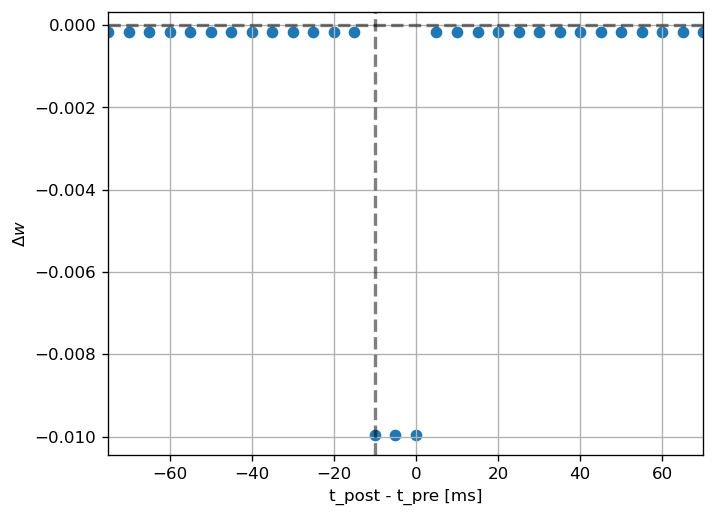

In [10]:
dt_vec, dw_vec, delay = stdp_window(neuron_model_name, synapse_model_name)

plot_stdp_window(dt_vec, dw_vec, delay)

References
----------

[1] Morrison A., Diesmann M., and Gerstner W. (2008) Phenomenological models of synaptic plasticity based on spike timing, Biol. Cybern. 98, 459–478 https://doi.org/10.1007/s00422-008-0233-1

[2] Front. Comput. Neurosci., 23 November 2010 Enabling functional neural circuit simulations with distributed computing of neuromodulated plasticity, Wiebke Potjans, Abigail Morrison and Markus Diesmann https://doi.org/10.3389/fncom.2010.00141 

[3] Rubin, Lee and Sompolinsky. Equilibrium Properties of Temporally Asymmetric Hebbian Plasticity. Physical Review Letters, 8 Jan 2001, Vol 86, No 2 http://doi.org/10.1103/PhysRevLett.86.364

[4] Vogels, Sprekeler, Zenke, Clopath and Gerstner (2011). Inhibitory Plasticity Balances Excitation and Inhibition in Sensory Pathways and Memory Networks. Science Vol 334 https://doi.org/10.1126/science.1211095 

Acknowledgements
----------------

This software was developed in part or in whole in the Human Brain Project, funded from the European Union’s Horizon 2020 Framework Programme for Research and Innovation under Specific Grant Agreements No. 720270 and No. 785907 (Human Brain Project SGA1 and SGA2).

License
-------

This notebook (and associated files) is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 2 of the License, or (at your option) any later version.

This notebook (and associated files) is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.